In [12]:
import pytrends
from pytrends.request import TrendReq

import matplotlib.pyplot as plt

In [34]:
# query trend information for the following keywords
keyword_list = ["Fin del mundo", "Calentamiento global", "Terremoto","Tsunami"]

# build the connection
pytrend = TrendReq(hl='es-ES', tz=360)

# Initialize an empty DataFrame to store the results
results_df = None

# get the trend information
for keyword in keyword_list:
    pytrend.build_payload(kw_list=[keyword], timeframe = 'today 5-y')
    interest_over_time = pytrend.interest_over_time()
    
    print(interest_over_time.head())
    # Merge the data into the results DataFrame
    if results_df is None:
        results_df = interest_over_time
    else:
        results_df = results_df.merge(interest_over_time, on='date', how='outer', suffixes=['', "_"+interest_over_time.columns[0]])


            Fin del mundo  isPartial
date                                
2018-10-21              0      False
2018-10-28              0      False
2018-11-04              0      False
2018-11-11              0      False
2018-11-18              0      False
            Calentamiento global  isPartial
date                                       
2018-10-21                     0      False
2018-10-28                     0      False
2018-11-04                     0      False
2018-11-11                     0      False
2018-11-18                     0      False
            Terremoto  isPartial
date                            
2018-10-21          0      False
2018-10-28          0      False
2018-11-04          0      False
2018-11-11          0      False
2018-11-18          0      False
            Tsunami  isPartial
date                          
2018-10-21        7      False
2018-10-28        6      False
2018-11-04        5      False
2018-11-11        6      False
2018-11-18      

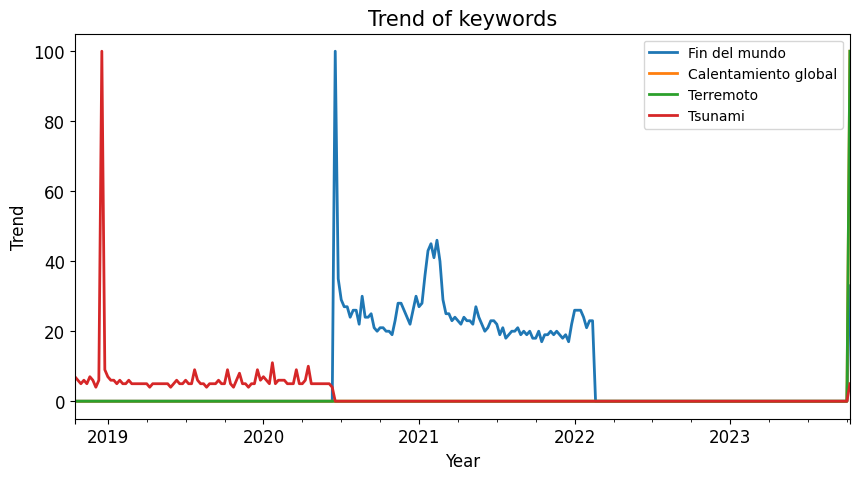

In [37]:
# plot the trend information
results_df.plot(figsize=(10,5), linewidth=2, fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Trend', fontsize=12)
plt.title('Trend of keywords', fontsize=15)
plt.savefig('trend.jpg')
plt.show()

In [40]:
results_df.to_csv('trends_df.csv', index=True)

In [38]:
results_df.describe()

,Fin del mundo,Calentamiento global,Terremoto,Tsunami
count,260.000000,260.000000,260.000000,260.000000
mean,8.469231,0.384615,0.384615,2.265385
std,13.227553,6.201737,6.201737,6.684474
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,20.000000,0.000000,0.000000,5.000000
max,100.000000,100.000000,100.000000,100.000000
